# Homework 5

## FINM 37400 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1. Forward Rates

Use the data set `famabliss_strips_2023-12-29.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per \1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by *stripping* out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of December in 2018 through 2023.

In [105]:
import pandas as pd
import numpy as np
import datetime
import warnings

import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [106]:
strips = pd.read_excel('../../finm-fixedincome-2024/data/famabliss_strips_2023-12-29.xlsx', index_col=0, parse_dates=True)
strips /= 100
strips

,1,2,3,4,5
date,,,,,
1952-06-30,0.981778,0.962531,0.942467,0.926341,0.904183
1952-07-31,0.980948,0.960315,0.939312,0.923089,0.898516
1952-08-29,0.980578,0.959750,0.937819,0.921458,0.895717
1952-09-30,0.980312,0.959098,0.937551,0.920961,0.891676
1952-10-31,0.981108,0.959745,0.937583,0.919290,0.897248
...,...,...,...,...,...
2023-08-31,0.948164,0.908535,0.874335,0.841044,0.810431
2023-09-29,0.947309,0.905277,0.868253,0.830803,0.796157
2023-10-31,0.947718,0.904355,0.864739,0.824363,0.786126


## 1.1

For each of the six dates, (Dec 2018, Dec 2019, ...), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

In [107]:
prices_filtered = strips[(strips.index.year >= 2018) & (strips.index.month == 12)]
prices_filtered

,1,2,3,4,5
date,,,,,
2018-12-31,0.974310,0.951959,0.929327,0.905801,0.882568
2019-12-31,0.984394,0.968938,0.952964,0.935710,0.918910
2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298
2023-12-29,0.953787,0.919644,0.888523,0.856672,0.826740


In [108]:
forward_discounts = prices_filtered.iloc[:, 1:]  / prices_filtered.iloc[:, : -1].values
forward_discounts.insert(0, 1, prices_filtered[1])
forward_discounts

,1,2,3,4,5
date,,,,,
2018-12-31,0.974310,0.977060,0.976226,0.974684,0.974351
2019-12-31,0.984394,0.984299,0.983514,0.981894,0.982046
2020-12-31,0.998959,0.998560,0.997773,0.994129,0.991997
2021-12-31,0.996173,0.989286,0.985541,0.983136,0.983031
2022-12-30,0.954636,0.959768,0.964111,0.963434,0.963870
2023-12-29,0.953787,0.964203,0.966159,0.964153,0.965059


<Axes: >

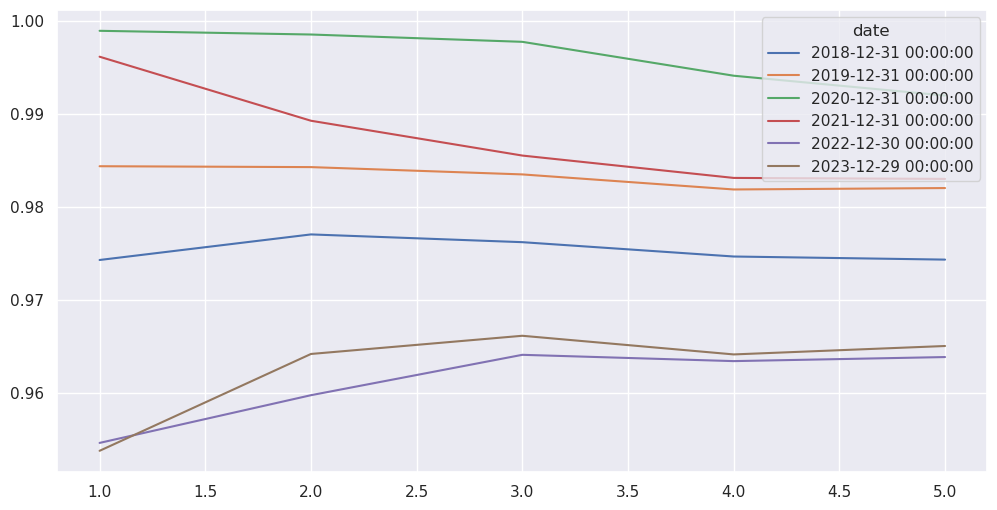

In [109]:
forward_discounts.T.plot()

## 1.2



Use $F$ above to calculate the continuously compounded forward rates, $f$, at the six dates.

Make a plot of the curve, $f$, at each of these six dates.

In [110]:
forward_rates = - np.log(forward_discounts)
forward_rates

,1,2,3,4,5
date,,,,,
2018-12-31,0.026026,0.023207,0.024061,0.025642,0.025984
2019-12-31,0.015729,0.015825,0.016624,0.018272,0.018117
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035
2021-12-31,0.003834,0.010772,0.014564,0.017008,0.017115
2022-12-30,0.046425,0.041064,0.036548,0.037252,0.036799
2023-12-29,0.047314,0.036454,0.034427,0.036505,0.035566


<Axes: >

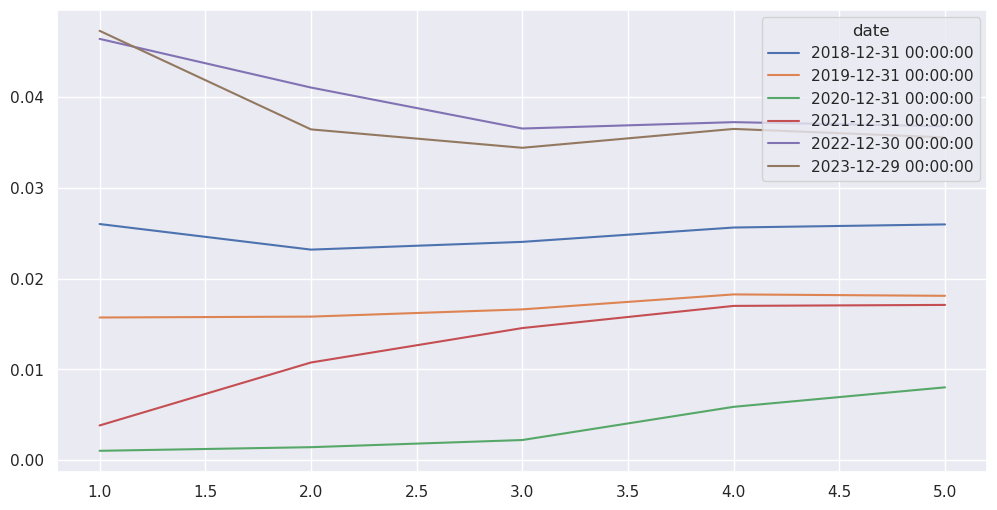

In [111]:
forward_rates.T.plot()

## 1.3

Calculate the continuously compounded spot rates, $r$, at the six dates.

Plot both the forward curve and the spot curve on the date of Dec 2018.

Recall that $f(t,t,t+1) = r(t,t+1)$.

In [112]:
spot_rates = - np.log(prices_filtered) / prices_filtered.columns
spot_rates

,1,2,3,4,5
date,,,,,
2018-12-31,0.026026,0.024617,0.024431,0.024734,0.024984
2019-12-31,0.015729,0.015777,0.016059,0.016612,0.016913
2020-12-31,0.001042,0.001242,0.001571,0.002650,0.003727
2021-12-31,0.003834,0.007303,0.009724,0.011545,0.012659
2022-12-30,0.046425,0.043744,0.041346,0.040322,0.039618
2023-12-29,0.047314,0.041884,0.039398,0.038675,0.038053


<Axes: >

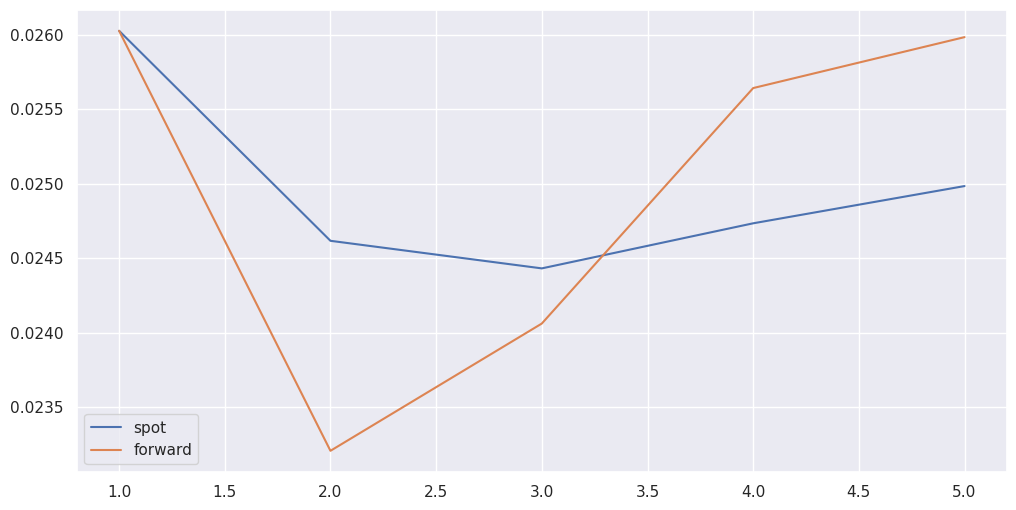

In [113]:
combined = pd.concat([spot_rates.loc['2018'], forward_rates.loc['2018']]).T
combined.columns = ['spot', 'forward']
combined.plot()

## 1.4

Plot the forward curve on Dec 2018 against the time-series evolution of $r(t,t+1)$ for dates $t$ between Dec 2018 and Dec 2022.

How does the evolution of one-year rates between 2018-2022 compare to the forward rates of 2018?

In [114]:
spot_rates.loc['2018' : '2022'][1]

date
2018-12-31    0.026026
2019-12-31    0.015729
2020-12-31    0.001042
2021-12-31    0.003834
2022-12-30    0.046425
Name: 1, dtype: float64

In [115]:
forward_rates.loc['2018'].T

date,2018-12-31
1,0.026026
2,0.023207
3,0.024061
4,0.025642
5,0.025984


In [116]:
combined = forward_rates.loc['2018'].T
combined.columns = ['forward']
combined['spot'] = spot_rates.loc['2018' : '2022'][1].values

<Axes: >

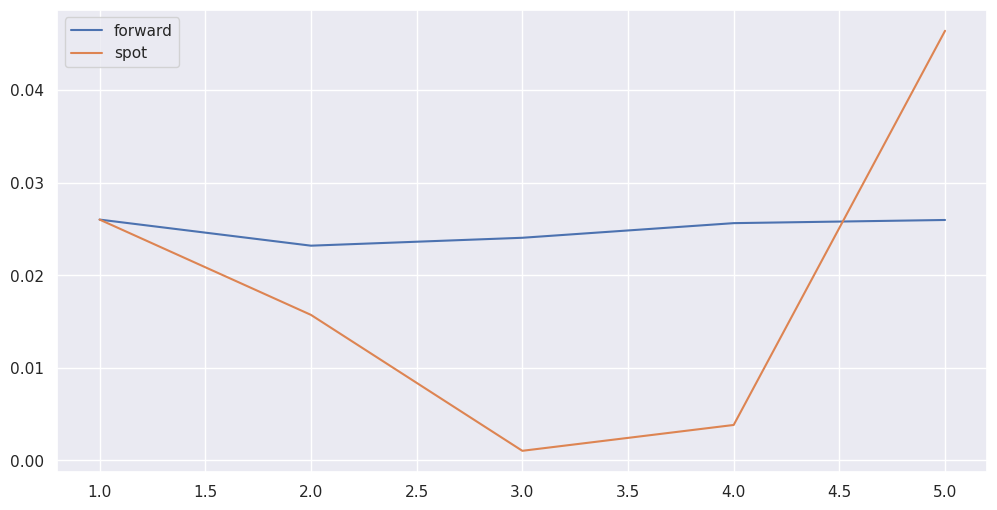

In [117]:
combined.plot()

***

# 2. Carry Trade

## 2.1

Suppose it is December 2018, and you determine to implement a carry trade with the following specification...

* Long 100 million (market value, not face value) of the 5-year zero-coupon bond (maturing Dec 2023.)
* Short 100 million (market value, not face value) of the 1-year zero-coupon bond (maturing Dec 2019.)
* Assume there is a 2% haircut on each side of the trade, so it requires 4 million of investor capital to initiate it.

1. Calculate the total profit and loss year-by-year.
1. Calculate the total return (Dec 2023) on the initial 4 million of investor capital.

#### Short position
* Each year you will roll over the short position to maintain a short 100 million (market value) in the 1-year bond.
* This will require injecting more cash into the trade, as the expiring short will require more than \$100 million to close out. 
* In Dec 2022, no need to open a new short position, as your long position will (at that point) be a one-year bond.

#### Alternatives
The scheme above is for simplicity. You could try more interesting ways of setting the short position...
* Open a new short position sized to whatever is needed to cover the expiring short position.
* Set the short positions to duration-hedge the long position.

In [118]:
columns = [1, 2, 3, 4, 5, 'cash'] 
positions = pd.DataFrame(0, index=prices_filtered.index, columns=columns)
value = pd.DataFrame(0, index=prices_filtered.index, columns=columns)
pnl = pd.DataFrame(0, index=prices_filtered.index, columns=columns)

LONG_POSITION = 100e6
SHORT_POSITION = 100e6

positions.loc[positions.index[0], 5] = LONG_POSITION
positions.loc[positions.index[0], 1] = -SHORT_POSITION

for i, date in enumerate(positions.index[1:]):
    previous_date = positions.index[i]
    
    # Roll over short position
    positions.loc[date, 1] = -SHORT_POSITION
    
    for bond in [2, 3, 4, 5]:
        positions.loc[date, bond] = positions.loc[previous_date, bond]
        value.loc[date, bond] = positions.loc[date, bond] * prices_filtered.loc[date, bond]
    
    pnl.loc[date] = value.loc[date] - value.loc[previous_date]
    pnl.loc[date, 'cash'] = positions.loc[date, 'cash'] - positions.loc[previous_date, 'cash']

print("Year-by-Year P&L:")
pnl

Year-by-Year P&L:


,1,2,3,4,5,cash
date,,,,,,
2018-12-31,0,0,0,0,0.000000e+00,0
2019-12-31,0,0,0,0,9.189097e+07,0
2020-12-31,0,0,0,0,6.262681e+06,0
2021-12-31,0,0,0,0,-4.286814e+06,0
2022-12-30,0,0,0,0,-1.183705e+07,0
2023-12-29,0,0,0,0,6.441775e+05,0


In [119]:
pnl['net'] = pnl.sum(axis=1)
pnl.loc['cumulative', 'net'] = pnl['net'].sum()
total_return = pnl.loc['cumulative', 'net'] / (LONG_POSITION + 4e6)
print("\nTotal Return on Initial Capital (Dec 2023): {:.2%}".format(total_return))


Total Return on Initial Capital (Dec 2023): 79.49%


## 2.2

How would this trade play out if the path of one-year spot rates equaled the forward rates observed in 2018?

**Answer:** As mark mentioned in class, this would kill our profits. Because if the forward rates had predicted spot rates, they wouldn't predict excess returns, thus we would't make any money.

## 2.3

Given Fact 3 of the *dynamic* (conditional) tests of EH in notebook W.5., do you expect that as of Dec 2023 the long-short trade above looks more or less favorable for Dec 2023-2028 than it did for Dec 2018-2023?

**Answer:** Fact #3 of the EH uses the forward spread to predict excess returns. Thus for this trade to be more favorable during the Dec 2023-2028, it's forward spread would have to be higher than that of the 2018-2023 period

***